# **SIN 393 – Introduction to Computer Vision (2023-2)**

# Lecture 01 - Part 3 - Image classification - color features

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the required libraries
---

In [1]:
import os

import numpy as np
from skimage import util, transform, filters, color, measure, morphology, io, exposure
from sklearn import model_selection, neighbors, metrics, preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### %matplotlib notebook
%matplotlib widget

## The dataset 
---
* Flowers detection dataset:

In [2]:
# 3 classes - 50 images in these classes
ds_path = 'data/flowers_toy'

# 3 classes - 6 images per class
#### ds_path = 'data/flowers_toy2'

### ***** Renomear os arquivos. Executar somente na primeira vez *****

In [3]:
# ***** Renomeia os arquivos. Executar somente uma vez *****

# # Iterate along the classes of the dataset
# for classe in classes_list:
#     # Listagem de todas as imagens na pasta daquela classe
#     filename_list = os.listdir(os.path.join(ds_path, classe))
#     filename_list.sort()
    
#     # Percorre os arquivos na pasta atual
#     for i, filename in enumerate(filename_list):
#         os.rename(os.path.join(ds_path, classe, filename), 
#                   os.path.join(ds_path, classe, f'{classe}{i:03}.{filename.split(".")[-1]}'))

## Loading the images from the dataset

In [4]:
# List of all folders in the folder 'ds_path' (classes)
classes_list = os.listdir(ds_path)

# List of all images in the dataset
image_list = []
# Lista of the image labels
label_list = []

# List of the image names
filename_list_ = []

# Iterate along the classes of the dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(ds_path, classe))

    filename_list.sort()
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Load the image
        img_temp = io.imread(os.path.join(ds_path, classe, filename))
        
        # Redimensiona a imagem para 64 x 64 
        img_temp = transform.resize(img_temp, (64, 64), anti_aliasing=True)
        
        # Append the image to a list
        image_list.append(img_temp)
        # Append the label to a list
        label_list.append(classe)
        # Append the file name to a list (para fins de visualização)
        filename_list_.append(filename)

label_list = np.array(label_list)

# Lista com os rótulos das imagens        
print(label_list)

['daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy'
 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy'
 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy'
 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy'
 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy'
 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'rose' 'rose' 'rose' 'rose'
 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose'
 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose'
 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose'
 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose'
 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'sunflower' 'sunflower'
 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflower'
 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflower'
 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflow

### Plotting the dataset images

* Plotting the N first images for each class.
* Important to start understanding the dataset.

In [5]:
# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(3):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list[j] for j in np.where(label_list==classes_list[i])[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list==classes_list[i])[0][:6]]

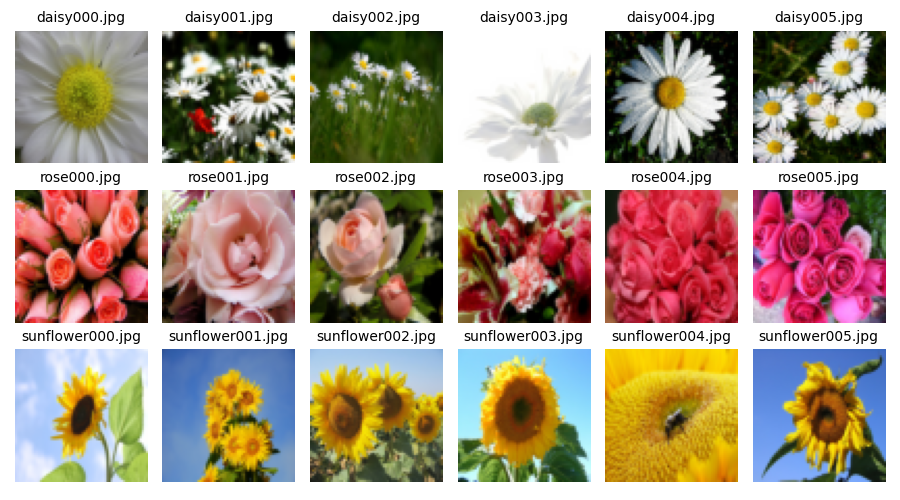

In [6]:
fig, ax  = plt.subplots(3, 6, figsize=(9, 5))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, vmin=0, vmax=255)
    ax[i//6, i%6].set_title(str(filename), fontsize=10)
    ax[i//6, i%6].axis('off')

fig.tight_layout()
plt.show()

## Extracting some color based features from images
----

In [7]:
# 2D array with the images features
# Each line stores information about an image. Each column stores one feature.
feature_mat = []

# Number of histogram bins 
n_bins = 32

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
    print('Imagem {} - classe {}'.format(i, label))
    
    # Convert the image data type to float
    # img_float = util.img_as_float(image)
    img_float = image

    # Compute the histogram for each channel
    hist_r = exposure.histogram(img_float[:,:,0], nbins=n_bins)[0]
    hist_g = exposure.histogram(img_float[:,:,1], nbins=n_bins)[0]
    hist_b = exposure.histogram(img_float[:,:,2], nbins=n_bins)[0]

    # Concatenet the histogramns in one single feature vector
    feat_hist = np.concatenate((hist_r, hist_g, hist_b))
    ### print(feat_hist)

    # Append the feature vector to the feature matrix
    feature_mat.append(feat_hist)

Imagem 0 - classe daisy
Imagem 1 - classe daisy
Imagem 2 - classe daisy
Imagem 3 - classe daisy
Imagem 4 - classe daisy
Imagem 5 - classe daisy
Imagem 6 - classe daisy
Imagem 7 - classe daisy
Imagem 8 - classe daisy
Imagem 9 - classe daisy
Imagem 10 - classe daisy
Imagem 11 - classe daisy
Imagem 12 - classe daisy
Imagem 13 - classe daisy
Imagem 14 - classe daisy
Imagem 15 - classe daisy
Imagem 16 - classe daisy
Imagem 17 - classe daisy
Imagem 18 - classe daisy
Imagem 19 - classe daisy
Imagem 20 - classe daisy
Imagem 21 - classe daisy
Imagem 22 - classe daisy
Imagem 23 - classe daisy
Imagem 24 - classe daisy
Imagem 25 - classe daisy
Imagem 26 - classe daisy
Imagem 27 - classe daisy
Imagem 28 - classe daisy
Imagem 29 - classe daisy
Imagem 30 - classe daisy
Imagem 31 - classe daisy
Imagem 32 - classe daisy
Imagem 33 - classe daisy
Imagem 34 - classe daisy
Imagem 35 - classe daisy
Imagem 36 - classe daisy
Imagem 37 - classe daisy
Imagem 38 - classe daisy
Imagem 39 - classe daisy
Imagem 40 

In [8]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_mat = np.array(feature_mat)

# Shape of the feature_map.
# Each row is a sample (image), and each column is a feature.
print(feature_mat.shape)

(150, 96)


In [9]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_mat.min(0))
    print(feature_mat.max(0))
    print(feature_mat.mean(0))
    print(feature_mat.std(0))

[ 1  0  2  2  1  3  0  0  1  2  2  5  7  7  6  7  9 10 13 13 15 10 12 16
 22 20 17 21  5  5  1  1  1  1  1  3  3  1  0  0  1  2  8  4  7  7  8  6
 12 17 17 20 10 12  7  6  3  5  3  1  0  0  0  1  3  3  7  5  9  4  9 10
  6  9  7  5  3  5  4  3  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
[2953 1094  584  596  593  559  495  455  385  816  874  423  987  512
  344  326  414  285  386  438  466  439  442  552  548  536  508  494
  452  466  557 2295 2960 1257  697  450  414  412  381  446  461  545
 1370  484  433  380  404  441  407  526  811  623 1307  489  431  981
  936  564  449  478  510  405  622 2266 3114 1396  872 1052 1226  722
  709  617  414  377  394  294  288  298  285  273  279  283  379  332
  351  358  322  407  561  399  860  725  832  694 1256 2241]
[183.9267 116.28   121.2267 129.4    125.4333 116.0267 115.18   113.
 113.1733 108.04   108.1     99.7533 102.4667 101.5     98.04    99.74
 101.1533 100.3733 107.7267 114.2733 123.3    131.1    137.0267 147.6467
 151.4

### Plotando as caracteristicas computadas

In [10]:
# Seleciona apenas as primeiras N imagens de cada classe
feature_mat_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(3):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    feature_mat_temp += [feature_mat[j] for j in np.where(label_list==classes_list[i])[0][:3]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list==classes_list[i])[0][:3]]

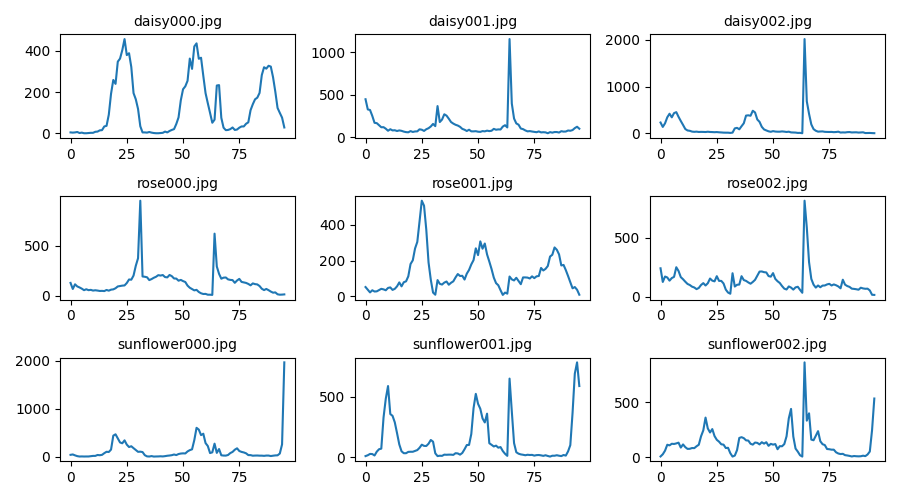

In [11]:
fig, ax  = plt.subplots(3, 3, figsize=(9, 5))

for i, (feature, filename) in enumerate(zip(feature_mat_temp, filename_list_temp)):
    ## ax[i//6, i%6].imshow(image, vmin=0, vmax=255)
    ax[i//3, i%3].plot(feature)
    ax[i//3, i%3].set_title(str(filename), fontsize=10)
    ### ax[i//6, i%6].axis('off')

fig.tight_layout()
plt.show()

## Cross-validation - Hold-out
---


In [12]:
# Selecionamos apenas duas caracteristicas: Área e maior-eixo
feature_mat_ok = feature_mat

In [13]:
# Separa 20% do conjuto de completo para TESTES. 80% para treinamento 1.
X_train_1, X_test, y_train_1, y_test, file_train_1, file_test = model_selection.train_test_split(feature_mat_ok, 
                                                                                                 label_list, 
                                                                                                 filename_list_,
                                                                                                 test_size=0.2, 
                                                                                                 stratify=label_list,
                                                                                                 random_state=42)

In [14]:
# Separa 25% do conjuto de treinamento 1 para validação.
#   -> Equivale a 20% do conjunto completo. 0,2 / 0,8 = 0,25
X_train_2, X_val, y_train_2, y_val, file_train_2, file_val = model_selection.train_test_split(X_train_1, 
                                                                                              y_train_1, 
                                                                                              file_train_1,
                                                                                              test_size=0.25, 
                                                                                              stratify=y_train_1,
                                                                                              random_state=42)

In [15]:
print(len(X_train_2))
print(len(X_val))
print(len(X_test))

90
30
30


## Feature normalization
---

In [16]:
# Média das caracteristicas do conjunto de treinamento
X_train_2_mean = X_train_2.mean(0)

# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_2_std = X_train_2.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train_2.mean(0))
    print(X_train_2.std(0))

[161.7111 119.2111 115.4778 122.2778 120.1667 112.8778 111.6    110.7667
 118.1889 116.9889 116.6444 104.3    110.2111 104.8556  98.7778  98.6444
  98.1     96.6778 103.2556 107.8778 122.7778 132.9444 137.1222 146.3
 147.6    157.6111 159.4556 156.6889 149.9111 147.3    135.4111 254.2667
 135.5556 121.2556 121.2    126.9333 133.7889 134.2    143.2111 147.5778
 146.6444 152.0444 162.1    153.5333 144.3111 140.5111 139.0889 132.8889
 131.6444 134.5    138.2333 136.9    136.7667 131.0222 120.0889 123.8
 122.2778 111.9667 110.0667  98.8667  89.1333  81.2111  74.8444 119.8333
 563.5667 295.1556 236.4222 209.7556 184.4222 151.7111 132.1    119.8778
 110.6667 101.3222  95.1444  90.4444  87.      83.3778  83.7889  81.7222
  80.1889  80.3333  79.1444  79.9444  81.8778  77.4     82.1333  84.9222
  85.4889  85.0778  87.8333  90.7556  99.8444  94.6111 109.8444 170.1222]
[372.1402 176.1093 121.803  120.7916 112.9859  93.2652  85.2786  83.6526
  92.6764 123.766  122.7049  78.9318 119.0844  84.1889  

In [17]:
# Transformada Normal de Caracteristicas (Manual)
# ----
# X_train_2_norm = (X_train_2 - X_train_2_mean) / X_train_2_std
# X_val_norm = (X_val - X_train_2_mean) / X_train_2_std
# X_test_norm = (X_test - X_train_2_mean) / X_train_2_std

# Transformada Normal de Caracteristicas (Sklearn)
# ----
scaler = preprocessing.StandardScaler().fit(X_train_2)
with np.printoptions(precision=4, suppress=True):
    print(f'Média:  \t {np.array(scaler.mean_)}')
    print(f'Desv. pad.: \t {np.array(scaler.scale_)}')

Média:  	 [161.7111 119.2111 115.4778 122.2778 120.1667 112.8778 111.6    110.7667
 118.1889 116.9889 116.6444 104.3    110.2111 104.8556  98.7778  98.6444
  98.1     96.6778 103.2556 107.8778 122.7778 132.9444 137.1222 146.3
 147.6    157.6111 159.4556 156.6889 149.9111 147.3    135.4111 254.2667
 135.5556 121.2556 121.2    126.9333 133.7889 134.2    143.2111 147.5778
 146.6444 152.0444 162.1    153.5333 144.3111 140.5111 139.0889 132.8889
 131.6444 134.5    138.2333 136.9    136.7667 131.0222 120.0889 123.8
 122.2778 111.9667 110.0667  98.8667  89.1333  81.2111  74.8444 119.8333
 563.5667 295.1556 236.4222 209.7556 184.4222 151.7111 132.1    119.8778
 110.6667 101.3222  95.1444  90.4444  87.      83.3778  83.7889  81.7222
  80.1889  80.3333  79.1444  79.9444  81.8778  77.4     82.1333  84.9222
  85.4889  85.0778  87.8333  90.7556  99.8444  94.6111 109.8444 170.1222]
Desv. pad.: 	 [372.1402 176.1093 121.803  120.7916 112.9859  93.2652  85.2786  83.6526
  92.6764 123.766  122.7049  78.

In [18]:
X_train_2_norm = scaler.transform(X_train_2)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

with np.printoptions(precision=4, suppress=True):
    print(f'Treino: \t {X_train_2_norm.mean():.4f} ± {X_train_2_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Treino: 	 -0.0000 ± 1.0000
Validação: 	 0.0074 ± 1.0655
Teste:   	 -0.0235 ± 1.0245


## Optimizing hyperparameters in the validation set
---

In [19]:
k_list = [1, 3, 5, 7, 9]

In [20]:
# Lista com as acurácias de traino
acc_train_list = []
# Lista com as acurácias de validação
acc_val_list = []

for k_ in k_list:
    # Constrói um classificador K-NN. K = k_
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_, n_jobs=1)

    # Treinando o classificador
    clf.fit(X_train_2_norm, y_train_2)

    # Testando o classificador (usando o conjunto de validação)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    
    # Testando o classificador (usando o conjunto de treino)
    # **** Apenas para comparar com o resultado da validação ****
    pred_train = clf.predict(X_train_2_norm)
    acc_train = metrics.accuracy_score(y_train_2, pred_train)
    
    acc_train_list.append(acc_train)  

C:\Users\joaof\anaconda3\envs\env-sin393-4-py39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\joaof\anaconda3\envs\env-sin393-4-py39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


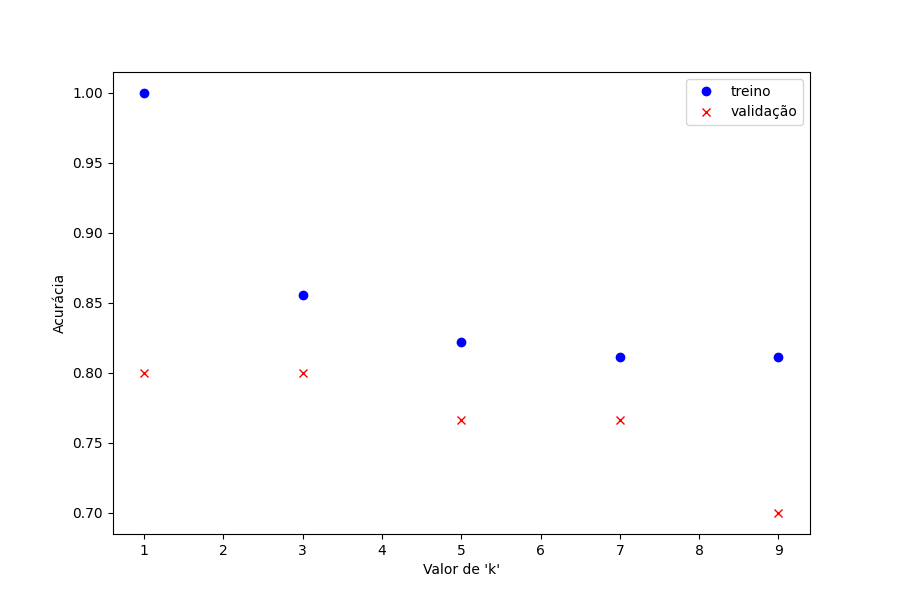

In [21]:
plt.figure(figsize=(9, 6))

plt.plot(k_list, acc_train_list, 'o', color='blue', label='treino')
plt.plot(k_list, acc_val_list, 'x', color='red', label='validação')
plt.xlabel("Valor de 'k'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

In [22]:
print('k \t acc. train \t acc. val')
print('----------------------------')
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'\nMelhor \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

k 	 acc. train 	 acc. val
----------------------------
1 	 1.0000 	 0.8000
3 	 0.8556 	 0.8000
5 	 0.8222 	 0.7667
7 	 0.8111 	 0.7667
9 	 0.8111 	 0.7000

Melhor 'k': 1 (0.8000 acc.)


## Evaluating the model over the test set
---

In [23]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_2_norm, y_train_2)

# Testando o classificador (usando o conjunto de TESTES)
pred = clf.predict(X_test_norm)
acc_val = metrics.accuracy_score(y_test, pred)

### Confusion matrix and classification report

In [24]:
print('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test, pred))

print('\nClassification report:')
print(metrics.classification_report(y_test, pred))


Confusion matrix:
[[8 2 0]
 [3 7 0]
 [1 0 9]]

Classification report:
              precision    recall  f1-score   support

       daisy       0.67      0.80      0.73        10
        rose       0.78      0.70      0.74        10
   sunflower       1.00      0.90      0.95        10

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30



### A detailed classification report

In [25]:
for i, (y_test_, pred_, filename_) in enumerate(zip(y_test, pred, file_test)):
    print(f'{i} \t {filename_} \t {y_test_} \t {pred_} \t {(y_test_ == pred_)}')

0 	 daisy038.jpg 	 daisy 	 rose 	 False
1 	 sunflower027.jpg 	 sunflower 	 sunflower 	 True
2 	 rose007.jpg 	 rose 	 rose 	 True
3 	 rose043.jpg 	 rose 	 daisy 	 False
4 	 daisy042.jpg 	 daisy 	 daisy 	 True
5 	 rose006.jpg 	 rose 	 rose 	 True
6 	 daisy022.jpg 	 daisy 	 daisy 	 True
7 	 daisy020.jpg 	 daisy 	 daisy 	 True
8 	 sunflower047.jpg 	 sunflower 	 sunflower 	 True
9 	 rose034.jpg 	 rose 	 rose 	 True
10 	 sunflower007.jpg 	 sunflower 	 sunflower 	 True
11 	 sunflower041.jpg 	 sunflower 	 sunflower 	 True
12 	 sunflower004.jpg 	 sunflower 	 sunflower 	 True
13 	 rose001.jpg 	 rose 	 rose 	 True
14 	 daisy007.jpg 	 daisy 	 daisy 	 True
15 	 daisy049.jpg 	 daisy 	 rose 	 False
16 	 daisy014.jpg 	 daisy 	 daisy 	 True
17 	 rose019.jpg 	 rose 	 rose 	 True
18 	 rose013.jpg 	 rose 	 daisy 	 False
19 	 sunflower038.jpg 	 sunflower 	 sunflower 	 True
20 	 daisy010.jpg 	 daisy 	 daisy 	 True
21 	 sunflower040.jpg 	 sunflower 	 daisy 	 False
22 	 rose008.jpg 	 rose 	 daisy 	 False
23 	

## Bibliography
---
* GONZALEZ, R.C.; WOODS, R.E. **Digital Image Processing.** 3rd ed. Pearson, 2007.
* COSTA, L. DA F.; CESAR-JR., R. M. **Shape analysis and classification: theory and practice.** CRC Press, 2000. Chapter 8.
* Scikit-image documentation.
    * https://scikit-image.org/docs/stable/
* scikit-learn - User Guide.
    * https://scikit-learn.org/stable/user_guide.html